In [3]:
import numpy as np
import matplotlib.pyplot as plt

def construct_hamiltonian(N, x, dx, h_bar, mass, alpha, q):
    potential = alpha * x**2 + q
    potential = np.diag(potential)

    hamiltonian = np.zeros((N, N))
    
    finite_diff = -2 * np.eye(N)
    finite_diff += np.eye(N, k=1)
    finite_diff += np.eye(N, k=-1)
    
    kinetic = -h_bar**2 / (mass * dx**2) * finite_diff
    
    hamiltonian = kinetic + potential*np.eye(N)

    return hamiltonian

[[ 2.45646089e-05+8.81631790e-05j  2.05078828e-05+9.02650272e-05j
   1.66255737e-05+9.27389713e-05j ...  3.74322129e-05+8.41916939e-05j
   3.30623656e-05+8.51201569e-05j  2.87612332e-05+8.64454663e-05j]
 [ 9.71937714e-05-4.49535445e-05j  9.34933297e-05-5.38614081e-05j
   8.89948175e-05-6.24425361e-05j ...  1.03302074e-04-1.71539957e-05j
   1.02107629e-04-2.65099950e-05j  1.00070205e-04-3.58065419e-05j]
 [ 7.20884180e-05+2.12651170e-04j  8.27357077e-05+2.09425339e-04j
   9.29856169e-05+2.05030856e-04j ...  3.93270110e-05+2.15056627e-04j
   5.02260337e-05+2.15470591e-04j  6.11991031e-05+2.14671225e-04j]
 ...
 [-1.44947889e-04+1.28537028e-05j -8.67863131e-04+1.09924436e-04j
  -1.30614594e-03+1.75194759e-04j ...  1.05819383e-05+1.64582314e-05j
   3.99106542e-05+1.29735268e-06j  4.42263948e-05-9.35506448e-06j]
 [ 1.47479558e-04-1.31841305e-05j  8.74597772e-04-1.10786349e-04j
   1.29707827e-03-1.74099495e-04j ... -1.07041975e-05-1.64619945e-05j
  -4.00556685e-05-1.30704949e-06j -4.38971355e-

c:\Users\kozy8\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

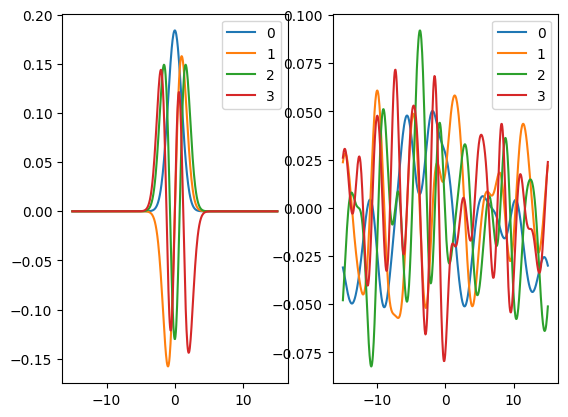

In [11]:
x_min = -15.0
x_max = 15.0
N = 500

# Create the grid
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define the physical parameters
mass = 1.0
h_bar = 1.0
alpha = 1.0
q = 10

hamiltonian = construct_hamiltonian(N, x, dx, h_bar, mass, alpha, q)

eigval, eigvec = np.linalg.eigh(hamiltonian)

eigvec = eigvec.T

levels = [0, 1, 2, 3]

plt.subplot(1,2,1)
for level in levels:
    plt.plot(x,eigvec[level]/np.linalg.norm(eigvec[level]))
    plt.legend(['0', '1', '2', '3'])

t = 0
t_max = 10
t_steps = 500
t_values = np.linspace(t, t_max, t_steps)
dt = t_values[1] - t_values[0]
count = 0

#momentum = 2 * np.pi * np.fft.fftfreq(len(points), dx)
#psi = np.exp((-1j * h_bar * eigval * dt)/ 2*mass)

while t <= t_max:

    psi = np.exp((-1j * eigval * (t+dt)/ 2 * mass * h_bar))

    momentum_wf = np.fft.fft(eigvec)
    #print("MWF 1", momentum_wf)

    momentum_wf *= psi
    #print("MWF 2", momentum_wf)

    #print("real", real)

    new_eigvec = np.fft.ifft(momentum_wf)
    #print("NEV 1", new_eigvec)

    norm = np.linalg.norm(new_eigvec)
    new_eigvec = new_eigvec / norm
   # print("NEV 2", new_eigvec)

    eigvec = new_eigvec.copy
    eigvec = new_eigvec.astype(complex)

    #print(eigvec)
    print(count)
    
    t += dt
    count += 1

#print(eigvec)

plt.subplot(1,2,2)
for level in levels:
    plt.plot(x,eigvec[level]/np.linalg.norm(eigvec[level]))
    plt.legend(['0', '1', '2', '3'])

plt.show